In [1]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
import plotnine as p9
import patchworklib as pw
from plotnine_prism import *
import numpy as np
import pandas as pd
import glob
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

<Figure size 300x300 with 0 Axes>

In [3]:
perf_report_files = glob.glob("../*/out_benchmark/summary/model_performance_bootstrapping.csv")
perf_report_files

['../cosMx_human_liver_cancer/out_benchmark/summary/model_performance_bootstrapping.csv',
 '../human_breast_cancers/out_benchmark/summary/model_performance_bootstrapping.csv',
 '../maynard_human_brain_analysis/out_benchmark/summary/model_performance_bootstrapping.csv',
 '../test_data/out_benchmark/summary/model_performance_bootstrapping.csv',
 '../10x_tupro/out_benchmark/summary/model_performance_bootstrapping.csv',
 '../cosMx_human_liver_normal/out_benchmark/summary/model_performance_bootstrapping.csv']

In [16]:
data = []
for file in perf_report_files:
    df = pd.read_csv(file)
    data.append(df)
data = pd.concat(data)
data["Dataset"] = data.dataset
data.ARI_median = data.ARI_median.astype(float).round(2)
data.ARI_std = data.ARI_std.astype(float).round(2)
data

,model,ARI_median,ARI_std,modality,dataset,Dataset
0,MUSE,0.01,0.00,transcriptomics + image,Human Liver Cancer,Human Liver Cancer
1,SpaGCN,0.06,0.00,transcriptomics + spatial + image,Human Liver Cancer,Human Liver Cancer
2,Leiden,0.07,0.00,transcriptomics,Human Liver Cancer,Human Liver Cancer
3,STAGATE,0.08,0.00,transcriptomics + spatial,Human Liver Cancer,Human Liver Cancer
4,BayesSpace,0.10,0.00,transcriptomics + spatial,Human Liver Cancer,Human Liver Cancer
5,GraphST,0.14,0.00,transcriptomics + spatial,Human Liver Cancer,Human Liver Cancer
6,Baseline,0.14,0.01,transcriptomics + image,Human Liver Cancer,Human Liver Cancer
7,stLearn,0.19,0.00,transcriptomics + spatial + image,Human Liver Cancer,Human Liver Cancer
8,AESTETIK,0.23,0.01,transcriptomics + spatial + image,Human Liver Cancer,Human Liver Cancer
0,MUSE,0.06,0.06,transcriptomics + image,Human Breast Cancer,Human Breast Cancer


In [29]:
def plot_matrix(data, models_to_show, 
                figsize=(30.9, 10), 
                legend_anchor_up=(0.0, 0.63), 
                legend_anchor_down=(0.0, 0.89),
                table_loc="left",
                table_cellLoc="center",
                show_platform=True,
                save=False):
    
    data = data.query("model in @models_to_show")
    data["model_rank"] = data.groupby("dataset").ARI_median.rank(ascending=False)
    data["str_value_median_std"] = data.apply(lambda x: f"{x.ARI_median}±{x.ARI_std}", axis=1)
    data.loc[data.model_rank == 1, "str_value_median_std"] = data.loc[data.model_rank == 1].str_value_median_std.apply(lambda x: "$\mathbf{" + x +"}$")
    table = pd.pivot_table(data, values="str_value_median_std", index="model", columns="dataset", aggfunc="first")
    table = table[['LIBD Human DLPFC', 'Tumor Profiler',
           'Human Breast Cancer', 'Human Liver Cancer',
           'Human Liver Normal']]
    table = table.loc[data.groupby("model").model_rank.agg("median").sort_values().index]
    
    
    modality_ordered = ['transcriptomics', 
                        'transcriptomics + spatial', 
                        'transcriptomics + image', 
                        'transcriptomics + spatial + image']
    
    modality_ordered = [m for m in modality_ordered if m in data.modality.unique()]
    
    colors = [plt.get_cmap("tab10")(i) for i in range(len(modality_ordered))]
    color_palette = {m:c for m,c in zip(modality_ordered, colors)}
    color_info = data[["model", "modality"]].drop_duplicates()
    color_info["color"] = color_info.modality.apply(lambda x: color_palette[x])
    color_info
    
    
    
    table_columns = ['LIBD Human DLPFC', 'Tumor Profiler',
                   'Human Breast Cancer', 'Human Liver Cancer',
                       'Human Liver Normal']
    
    plt.rcParams["figure.figsize"] = [*figsize]
    plt.rcParams["figure.autolayout"] = True
    fig, axs = plt.subplots(1, 1)
    axs.axis('tight')
    axs.axis('off')
    
    the_table = axs.table(cellText=table.values, 
                          colLabels=table_columns, 
                          rowLabels=table.index, 
                          loc=table_loc, 
                          cellLoc=table_cellLoc)


    hatch_legend_patches = []

    for c,h,l in zip(["mistyrose", "lightblue"], ["//", "//"], ["10x Visium Genomics", "CosMx NanoString"]):
            hatch_legend_patches.append(mpatches.Patch(facecolor=c, 
                                                       edgecolor="black", 
                                                       hatch=h, 
                                                       label=l))
    # Adjust cell dimensions (change the width and height as needed)
    for (i, j), cell in the_table._cells.items():
        if i == 0:
            #cell.set_text_props(weight='bold')  # Make header cells bold
            cell.set_fontsize(25)  # Adjust font size for header cells
            cell.set_height(0.1)  # Reduce header cell height
        else:
            cell.set_fontsize(25)  # Adjust font size for data cells
            cell.set_height(0.085)  # Reduce data cell height

        text = cell.get_text().get_text()
        if  j == -1 and i == 1:
            cell.get_text().set_text("$\mathbf{" + text +"}$")



        if i == 0 and j < 3:
            cell.set_hatch('/')  # Add diagonal stripes to header cells
            cell.set_facecolor("mistyrose")
            color = cell.get_facecolor()
            cell.set_facecolor((color[0], color[1], color[2], 0.7))
            cell.set_alpha(0.3)
        elif i == 0 and j >= 3:
            cell.set_hatch('/')  # Add diagonal stripes to header cells
            cell.set_facecolor("lightblue")
            color = cell.get_facecolor()
            cell.set_facecolor((color[0], color[1], color[2], 0.7))
            cell.set_alpha(0.3)

    # Adjust cell width (change the width as needed)
    for column in range(len(table_columns)):
        the_table.auto_set_column_width(column)


    # Color the row labels
    for i, label in enumerate(table.index):
        the_table[i + 1, -1].set_facecolor(color_info[color_info.model == label].color.values[0])  # Assuming the last column is for row labels
        cell = the_table[i + 1, -1]
        color = cell.get_facecolor()
        cell.set_facecolor((color[0], color[1], color[2], 0.7))

    # Add a legend
    legend_labels = color_palette.keys()  # Modify this with your legend labels
    legend_colors = color_palette.values()  # Modify this with your legend colors

    # Create custom legend patches
    legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

    # Place the legend to the right of the table
    legend = plt.legend(handles=legend_patches, title="Modality", title_fontsize=25, alignment="left", fontsize=25, loc='upper left', bbox_to_anchor=legend_anchor_up)
    plt.gca().add_artist(legend)
    
    if show_platform:
        hatch_legend = plt.legend(handles=hatch_legend_patches, title="Platform", title_fontsize=25, alignment="left", fontsize=25, loc='upper left', bbox_to_anchor=legend_anchor_down)
        # Add the hatch pattern legend to the figure
        plt.gca().add_artist(hatch_legend)
    # Add text clarification at the bottom of the plot
    if save:
        models_to_show = "_".join(models_to_show)
        plt.savefig(f"figures/table_model_performance_bootstrapping_{models_to_show}.png", dpi=150, bbox_inches='tight')
    plt.show()

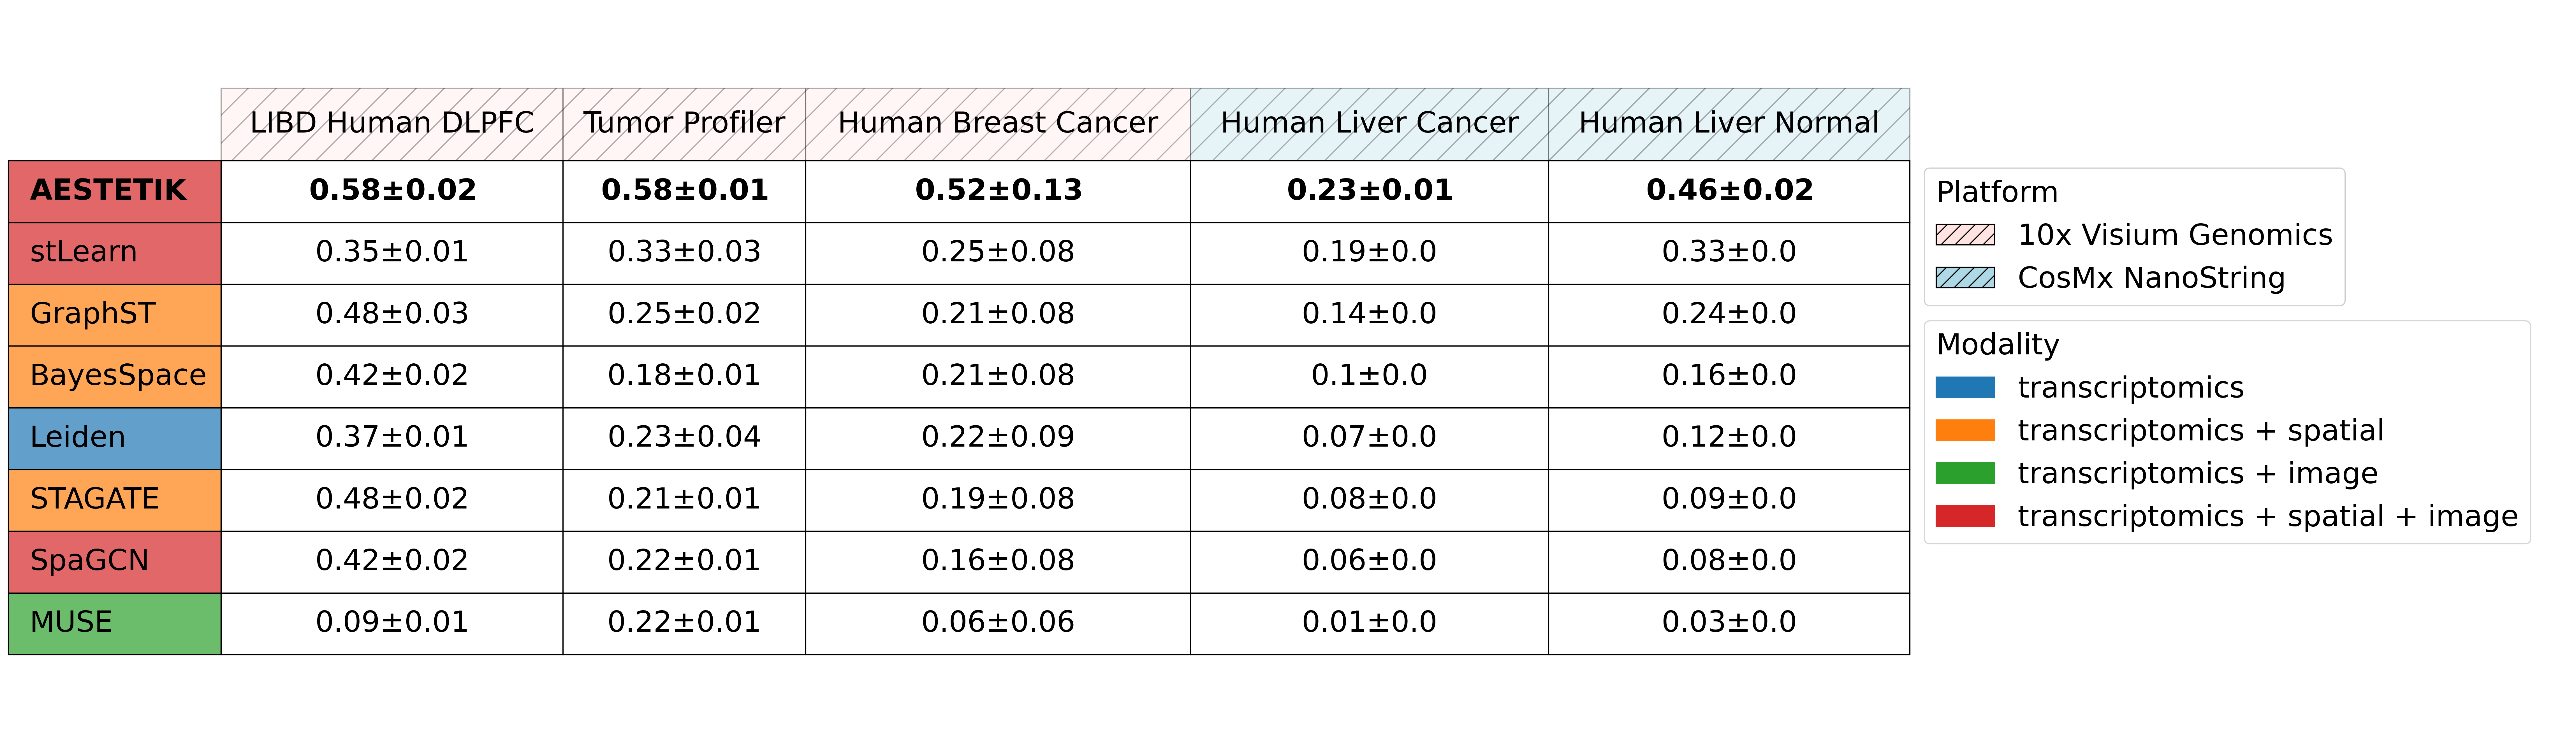

In [30]:
models = ["AESTETIK", "GraphST", "STAGATE", "BayesSpace", "stLearn", "SpaGCN", "MUSE", "Leiden", "Louvain"]
plot_matrix(data, models, figsize=(30.8, 9), 
            legend_anchor_up=(0.0, 0.59), 
            legend_anchor_down=(0.0, 0.80),
            save=True)